In [1]:
import pandas as pd
import numpy as np

In [2]:
predicted013 = pd.read_csv("./models/20180806/predict/predicted-013013_20170406_000.csv")
predicted013 = predicted013.set_index("timestamp")
predicted013.head()

,NO_LABEL,ROLL,RUN,DOOR
timestamp,,,,
2017-04-06T07:56:37.391,0.024222,0.975765,0.000013,4.725860e-09
2017-04-06T07:56:38.391,0.050397,0.949581,0.000022,2.532548e-08
2017-04-06T07:56:39.391,0.021869,0.978104,0.000026,1.324938e-08
2017-04-06T07:56:40.391,0.044357,0.955492,0.000150,4.967873e-07
2017-04-06T07:56:41.391,0.204391,0.795597,0.000012,5.520221e-08


## Uncertainly Sampling

### margin sampling

In [25]:
max2max = []
for index, row in predicted013.iterrows():
    Row = np.array(row)
    Row = np.sort(Row)
    max2max.append(Row[3] - Row[2])

In [26]:
data = {"margin": max2max}

In [27]:
f = pd.DataFrame(data)
f["timestamp"] = predicted013.index

In [28]:
f = f.set_index("timestamp")
f.head()

,margin
timestamp,
2017-04-06T07:56:37.391,0.951544
2017-04-06T07:56:38.391,0.899183
2017-04-06T07:56:39.391,0.956235
2017-04-06T07:56:40.391,0.911135
2017-04-06T07:56:41.391,0.591206


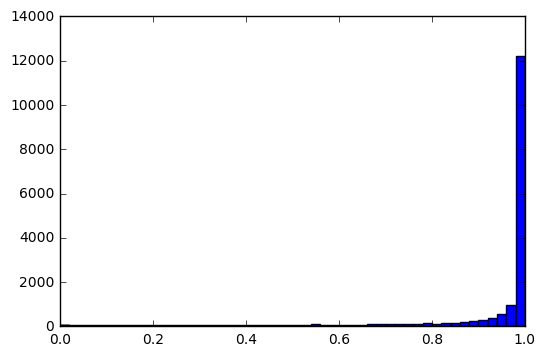

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.hist(f["margin"], bins=50)
plt.savefig("./image/margin.png")
plt.show()

#### 階級値と度数

In [33]:
x = y = z = a = b = c = d = e = g = over = 0
for index, row in f.iterrows():
    i = float(row)
    if i <= 0.1:
        x += 1
    elif i <= 0.2:
        y += 1
    elif i <= 0.3:
        z += 1
    elif i <= 0.4:
        a += 1
    elif i <= 0.5:
        b += 1
    elif i <= 0.6:
        c += 1
    elif i <= 0.7:
        d += 1
    elif i <= 0.8:
        e += 1
    elif i <= 0.9:
        g += 1
    elif i <= 1:
        over += 1
print(x,y,z,a,b,c,d,e,g,over)#度数

279 249 272 272 274 333 417 572 900 14347


In [36]:
maginclass = []
x = y = z = a = b = c = d = e = g = over = 0
for index, row in f.iterrows():
    i = float(row)
    if i <= 0.1:
        maginclass.append(0.1)
    elif i <= 0.2:
        y += 1
        maginclass.append(0.2)
    elif i <= 0.3:
        z += 1
        maginclass.append(0.3)
    elif i <= 0.4:
        a += 1
        maginclass.append(0.4)
    elif i <= 0.5:
        b += 1
        maginclass.append(0.5)
    elif i <= 0.6:
        c += 1
        maginclass.append(0.6)
    elif i <= 0.7:
        d += 1
        maginclass.append(0.7)
    elif i <= 0.8:
        e += 1
        maginclass.append(0.8)
    elif i <= 0.9:
        g += 1
        maginclass.append(0.9)
    elif i <= 1:
        over += 1
        maginclass.append(1)

In [38]:
f["class"] = maginclass

In [39]:
f.head()

,margin,class
timestamp,,
2017-04-06T07:56:37.391,0.951544,1.0
2017-04-06T07:56:38.391,0.899183,0.9
2017-04-06T07:56:39.391,0.956235,1.0
2017-04-06T07:56:40.391,0.911135,1.0
2017-04-06T07:56:41.391,0.591206,0.6


In [47]:
classlist = f[f["class"] == 0.1].index
classlist

Index(['2017-04-06T08:17:40.469', '2017-04-06T08:23:21.460',
       '2017-04-06T08:24:25.459', '2017-04-06T08:24:29.459',
       '2017-04-06T08:25:16.457', '2017-04-06T08:26:40.455',
       '2017-04-06T08:27:42.453', '2017-04-06T08:28:17.453',
       '2017-04-06T08:28:21.453', '2017-04-06T08:28:37.452',
       ...
       '2017-04-06T14:15:09.174', '2017-04-06T14:15:30.182',
       '2017-04-06T14:17:30.184', '2017-04-06T14:23:06.175',
       '2017-04-06T14:23:34.174', '2017-04-06T14:25:18.171',
       '2017-04-06T14:25:19.171', '2017-04-06T14:26:19.169',
       '2017-04-06T14:30:17.161', '2017-04-06T14:30:38.160'],
      dtype='object', name='timestamp', length=279)

In [50]:
import csv

classcsv = open('./models/20180806/class/test.csv', 'w')

writer = csv.writer(classcsv, lineterminator=',')
writer.writerow(classlist)

classcsv.close()

### cepstrum読み込み

In [15]:
import pandas as pd

classcsv = pd.read_csv("./models/20180806/class/0.1-001001_20170406_000.csv")
accel = pd.read_csv("./cepstrums/001/001_20170406_000.accel.csv")
gyro = pd.read_csv("./cepstrums/001/001_20170406_000.gyro.csv")
label = pd.read_csv("./cepstrums/001/001_20170406_000.label.csv")

#accel[accel["timestamp"] == classcsv["timestamp"]]
classcsv = classcsv.set_index("timestamp")
accelamb = pd.DataFrame(columns=("timestamp","car_id","cepstrum_x00","cepstrum_x01","cepstrum_x02","cepstrum_x03","cepstrum_x04","cepstrum_x05","cepstrum_x06","cepstrum_x07","cepstrum_x08","cepstrum_x09","cepstrum_x10","cepstrum_x11","cepstrum_x12","cepstrum_x13","cepstrum_x14","cepstrum_x15","cepstrum_x16","cepstrum_x17","cepstrum_x18","cepstrum_x19","cepstrum_x20","cepstrum_x21","cepstrum_x22","cepstrum_x23","cepstrum_x24","cepstrum_x25","cepstrum_x26","cepstrum_x27","cepstrum_x28","cepstrum_x29","cepstrum_y00","cepstrum_y01","cepstrum_y02","cepstrum_y03","cepstrum_y04","cepstrum_y05","cepstrum_y06","cepstrum_y07","cepstrum_y08","cepstrum_y09","cepstrum_y10","cepstrum_y11","cepstrum_y12","cepstrum_y13","cepstrum_y14","cepstrum_y15","cepstrum_y16","cepstrum_y17","cepstrum_y18","cepstrum_y19","cepstrum_y20","cepstrum_y21","cepstrum_y22","cepstrum_y23","cepstrum_y24","cepstrum_y25","cepstrum_y26","cepstrum_y27","cepstrum_y28","cepstrum_y29","cepstrum_z00","cepstrum_z01","cepstrum_z02","cepstrum_z03","cepstrum_z04","cepstrum_z05","cepstrum_z06","cepstrum_z07","cepstrum_z08","cepstrum_z09","cepstrum_z10","cepstrum_z11","cepstrum_z12","cepstrum_z13","cepstrum_z14","cepstrum_z15","cepstrum_z16","cepstrum_z17","cepstrum_z18","cepstrum_z19","cepstrum_z20","cepstrum_z21","cepstrum_z22","cepstrum_z23","cepstrum_z24","cepstrum_z25","cepstrum_z26","cepstrum_z27","cepstrum_z28","cepstrum_z29"))
gyroamb = pd.DataFrame(columns=("timestamp","car_id","cepstrum_x00","cepstrum_x01","cepstrum_x02","cepstrum_x03","cepstrum_x04","cepstrum_x05","cepstrum_x06","cepstrum_x07","cepstrum_x08","cepstrum_x09","cepstrum_x10","cepstrum_x11","cepstrum_x12","cepstrum_x13","cepstrum_x14","cepstrum_x15","cepstrum_x16","cepstrum_x17","cepstrum_x18","cepstrum_x19","cepstrum_x20","cepstrum_x21","cepstrum_x22","cepstrum_x23","cepstrum_x24","cepstrum_x25","cepstrum_x26","cepstrum_x27","cepstrum_x28","cepstrum_x29","cepstrum_y00","cepstrum_y01","cepstrum_y02","cepstrum_y03","cepstrum_y04","cepstrum_y05","cepstrum_y06","cepstrum_y07","cepstrum_y08","cepstrum_y09","cepstrum_y10","cepstrum_y11","cepstrum_y12","cepstrum_y13","cepstrum_y14","cepstrum_y15","cepstrum_y16","cepstrum_y17","cepstrum_y18","cepstrum_y19","cepstrum_y20","cepstrum_y21","cepstrum_y22","cepstrum_y23","cepstrum_y24","cepstrum_y25","cepstrum_y26","cepstrum_y27","cepstrum_y28","cepstrum_y29","cepstrum_z00","cepstrum_z01","cepstrum_z02","cepstrum_z03","cepstrum_z04","cepstrum_z05","cepstrum_z06","cepstrum_z07","cepstrum_z08","cepstrum_z09","cepstrum_z10","cepstrum_z11","cepstrum_z12","cepstrum_z13","cepstrum_z14","cepstrum_z15","cepstrum_z16","cepstrum_z17","cepstrum_z18","cepstrum_z19","cepstrum_z20","cepstrum_z21","cepstrum_z22","cepstrum_z23","cepstrum_z24","cepstrum_z25","cepstrum_z26","cepstrum_z27","cepstrum_z28","cepstrum_z29"))
labelamb = pd.DataFrame(columns=("timestamp","car_id","NO_LABEL","ROLL","RUN","DOOR"))

for index, row in classcsv.iterrows():
    accelamb = accelamb.append(accel[accel["timestamp"] == index])
    gyroamb = gyroamb.append(gyro[gyro["timestamp"] == index])
    labelamb = labelamb.append(label[label["timestamp"] == index])

In [17]:
accelamb = accelamb.set_index("timestamp")
gyroamb = gyroamb.set_index("timestamp")
labelamb = labelamb.set_index("timestamp")
accelamb.to_csv("./models/20180807/ambcepstrums/amb.accel.csv")
gyroamb.to_csv("./models/20180807/ambcepstrums/amb.gyro.csv")
labelamb.to_csv("./models/20180807/ambcepstrums/amb.label.csv")

### read_csv変換

In [1]:
import create_model
testcar = []
xdata, xlabel, ydata, ylabel = create_model.read_datas("./models/20180807/ambcepstrums",testcar,3,1)

/home/aj1m0n/jupyter_notebook/Datamining/20180731/create_model.py:176: SyntaxWarning: name 'predicted' is assigned to before global declaration
  global predicted #モジュールのグローバル化


['./models/20180807/ambcepstrums/*.label.csv']


Using TensorFlow backend.
/home/aj1m0n/jupyter_notebook/Datamining/20180731/create_model.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  _labels["date"] = np.datetime_as_string(labels.timestamp, "D")#timeごとに整列化


### 再学習

In [23]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import model_from_json
from keras.models import load_model
from keras.utils import np_utils
from keras.optimizers import Adam
import keras.callbacks
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
import os.path
from os import path
import random as rn
import glob

import create_model
from create_model import read_csv
from create_model import read_datas


#pra
batch_size = 100
epochs = 40
units = 180
timestep = 3
timeshift = 1

#ファイルの読み込み
indir = "./cepstrums/"
eval_car_ids = ["001"]
f_model = "./models/20180806/model/"
model_filename = 'model005_010_011_013.model'
f_weithts = "./models/20180806/weight"
weights_filename = "weight005_010_011_013.h5"
outeval = "./models/20180807/act_eval/test.csv"
outmodel = "./models/20180807/model/test.model"
outweights = "./models/20180807/weight/test.h5"
outpredict = "./"
#random seed を固定
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(1)
rn.seed(1)
session_conf = tf.ConfigProto(
intra_op_parallelism_threads=1,
inter_op_parallelism_threads=1
)
tf.set_random_seed(1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
KTF.set_session(sess)#固定終わり

##学習
try:
    json_string = f_model + model_filename
    #model = model_from_json(json_string)    
    model = load_model(json_string)
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.5), metrics=['accuracy'])
    model.load_weights(os.path.join(f_weithts,weights_filename))

    cbks = []

    history = model.fit(xdata, xlabel, batch_size = 100, epochs = epochs, callbacks = []
                  , validation_data = [ydata, ylabel], 
                   verbose = 2)
    #outdir = path.dirname(outmodel)
    #if not outdir is None and len(outdir) > 0 and not path.isdir(outdir): os.makedirs(outdir)
    model.save(outmodel)
    model.save_weights(outweights)
    #predicted = model.predict(ydata, batch_size = args.batch_size)
    #predicted = np.argmax(predicted, axis = -1)
    #add_predicted(metapath, predicted)
        
    with open(outeval, "wt") as f:#変更
        _headers = ["accel", "gyro", "label","data_counts", "loss", "accuracy", "macro-fmesure"]
        _headers += ["NO_LABEL", "ROLL", "RUN", "DOOR"]
        f.write(",".join(_headers))
        f.write("\n")
        #if args.eval_car_ids is None or len(args.eval_car_ids) == 0: file_ptns = [path.join(args.indir, "*/*.label.csv")]
        if eval_car_ids is None or len(eval_car_ids) == 0: file_ptns = [os.path.join(indir, "*/*.label.csv")]
        #else: file_ptns = [path.join(args.indir, "%03d/*.label.csv" % i) for i in args.eval_car_ids]
        else: file_ptns = [os.path.join(indir, "%s/*.label.csv" % i) for i in eval_car_ids]
        for _ptn in file_ptns:
            for _label in glob.glob(_ptn, recursive = True):
                # if "20170406" in _label or "20170511" in _label: continue # 20170406 もしくは 20170511を訓練データとする
                _accel = _label.replace("label", "accel")
                _gyro = _label.replace("label", "gyro")
                #read_csv(accel_file: str, gyro_file: str, label_file: str, timestep: int, timeshift: int)
                _edata, _elabel = read_csv(_accel, _gyro, _label, timestep, timeshift)#変更
                _elabel = np_utils.to_categorical(np.argmax(_elabel[["NO_LABEL", "ROLL", "RUN", "DOOR"]].values, axis = -1), num_classes = 4)

                if len(_edata) == 0: continue
                eval = model.evaluate(_edata, _elabel, batch_size = 100, verbose = 1)

                counts = np.zeros((4, 3))

                #predicted
                predicted = model.predict(_edata)
                #labeldata 読み込み
                #labelcsv = pd.read_csv("./cepstrums/001/001_20170406_000.label.csv")
                #print(_label)
                #_label = labelcsv.replace("/home/aj1m0n/jupyter_notebook/Datamining/20180731/cepstrums/", "-").replace(".label", "").replace("/","")

                #predictedcsv保存
                #predicted_csv = pd.DataFrame(predicted)
                #predicted_csv.columns = ["NO_LABEL", "ROLL", "RUN", "DOOR"]
                #predicted_csv["timestamp"] = labelcsv["timestamp"]
                #predicted_csv = predicted_csv.set_index("timestamp")
                #predicted_csv.to_csv("./models/20180806/predict/predicted%s" %_label, index=False)#csv保存
                #predicted_csv.to_csv("%spredicted%s" %(outpredict,_label), index=False)#csv保存
                #global predicted #モジュールのグローバル化

                #F値の処理
                try:
                    _tlabel = np.argmax(_elabel, axis = -1)
                    _plabel = np.argmax(predicted, axis = -1)
                    for _t, _p in zip(_tlabel, _plabel):
                        if _t == _p: counts[_p, 0] += 1
                        counts[_p, 1] += 1
                        counts[_t, 2] += 1
                    _macro_fmesure = 0.0
                    _fmesures = []
                    for _i in range(4):
                        if counts[_i, 1] == 0 or counts[_i, 2] == 0: continue
                        _precision = counts[_i, 0] / counts[_i, 1]
                        _recall = counts[_i, 0] / counts[_i, 2]
                        _fmesure = 2 * (_precision * _recall) / (_precision + _recall)
                        _macro_fmesure += _fmesure
                        _fmesures.append(_fmesure)
                    _macro_fmesure /= 4

                    line = [path.basename(_accel), path.basename(_gyro), path.basename(_label), str(_edata.shape[0])
                            , "{:0.8f}".format(eval[0]), "{:0.8f}".format(eval[1]), "{:0.8f}".format(_macro_fmesure)]
                    line += ["{:0.8f}".format(v) for v in _fmesures]
                    f.write(",".join(line))
                    f.write("\n")
                except:
                    print("ERROR", _edata, predicted)
                    _macro_fmesure = 0.0
                    line = [path.basename(_accel), path.basename(_gyro), path.basename(_label), str(_edata.shape[0])
                            , "{:0.8f}".format(eval[0]), "{:0.8f}".format(eval[1]), "{:0.8f}".format(_macro_fmesure)]
                    f.write(",".join(line))
                    f.write("\n")
finally:
    sess.close()
    print('Goodbye, world!')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 3, 180)            0         
_________________________________________________________________
LSTM (LSTM)                  (None, 180)               259920    
_________________________________________________________________
Dense1 (Dense)               (None, 180)               32580     
_________________________________________________________________
Dense2 (Dense)               (None, 180)               32580     
_________________________________________________________________
Dense3 (Dense)               (None, 4)                 724       
_________________________________________________________________
out (Dense)                  (None, 4)                 20        
Total params: 325,824
Trainable params: 325,824
Non-trainable params: 0
_________________________________________________________________
Trai

In [4]:
import glob
cid = "-001"
file_list = glob.glob("./models/20180806/class/" + "*%s*" %cid)

In [5]:
file_list

['./models/20180806/class/0.2-001001_20170407_000.csv',
 './models/20180806/class/0.2-001001_20170406_000.csv',
 './models/20180806/class/0.1-001001_20170406_000.csv',
 './models/20180806/class/0.1-001001_20170407_000.csv']

In [1]:
from relearning import relearning

for day in ["20170406","20170407"]:
    for carid in ["001"]:
        relearning(f_cep = "./models/20180820/data/add/%s/"%day,
                            f_model = "./models/20180806/model/",
                            f_weight = "./models/20180806/weight/",
                            car_ids =  [carid],
                            eval_car_ids = [carid],
                            outeval = "./models/20180820/eval/reeval/%s/"%day,
                            outmodel = "./models/20180820/model/%s/"%day,
                            outweights = "./models/20180820/weight/%s/"%day,
                            outpredict = "./models/20180820/predict/%s"%day,
                            batch_size = 50,
                            epochs = 10,
                            units = 180,
                            timestep = 3,
                            timeshift = 1,
                        )

Using TensorFlow backend.


['./models/20180806/model/model005_010_011_013.model']
['./models/20180820/data/add/20170406/001/0022.label.csv', './models/20180820/data/add/20170406/001/0011.label.csv', './models/20180820/data/add/20170406/001/0023.label.csv', './models/20180820/data/add/20170406/001/0032.label.csv', './models/20180820/data/add/20170406/001/0033.label.csv', './models/20180820/data/add/20170406/001/0020.label.csv', './models/20180820/data/add/20170406/001/0036.label.csv', './models/20180820/data/add/20170406/001/0002.label.csv', './models/20180820/data/add/20170406/001/0021.label.csv', './models/20180820/data/add/20170406/001/0006.label.csv', './models/20180820/data/add/20170406/001/0000.label.csv', './models/20180820/data/add/20170406/001/0009.label.csv', './models/20180820/data/add/20170406/001/0016.label.csv', './models/20180820/data/add/20170406/001/0029.label.csv', './models/20180820/data/add/20170406/001/0028.label.csv', './models/20180820/data/add/20170406/001/0034.label.csv', './models/201808

/home/aj1m0n/jupyter_notebook/Datamining/20180731/create_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  _labels["date"] = np.datetime_as_string(labels.timestamp, "D")#timeごとに整列化


./models/20180806/model/model005_010_011_013.model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 3, 180)            0         
_________________________________________________________________
LSTM (LSTM)                  (None, 180)               259920    
_________________________________________________________________
Dense1 (Dense)               (None, 180)               32580     
_________________________________________________________________
Dense2 (Dense)               (None, 180)               32580     
_________________________________________________________________
Dense3 (Dense)               (None, 4)                 724       
_________________________________________________________________
out (Dense)                  (None, 4)                 20        
Total params: 325,824
Trainable params: 325,824
Non-trainable params: 0
___________________

KeyboardInterrupt: 